In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

In [36]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
print(X_valid[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
def show_numbers(index, X_array, y_array):
    imagem = X_array[index]
    img = imagem.reshape(28,28)
    plt.imshow(img, cmap = plt.cm.binary,interpolation="nearest")
    plt.axis("off")
    plt.show()
    print(y_array[index])

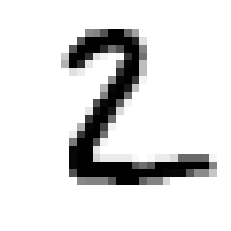

2


In [10]:
example = show_numbers(1, X_test, y_test)

In [11]:
#modelo simples apenas para fins de teste

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [12]:
#compilação e parametros de treino do modelo
model.compile(loss = "sparse_categorical_crossentropy", #Classe são esparças e n são one-hot, binarias, ACHO que deve ser a melhor loss
              optimizer = "sgd", #gradiente descendete estocastico simples, alg de retropropagação
              metrics = ["accuracy"] #paramnetro de evolução 
                ) 

In [13]:
#treino supers simples, somente para fins de criar um modelo
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6065 - accuracy: 0.8425 - val_loss: 0.3007 - val_accuracy: 0.9170
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2848 - accuracy: 0.9184 - val_loss: 0.2410 - val_accuracy: 0.9344
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2322 - accuracy: 0.9341 - val_loss: 0.1980 - val_accuracy: 0.9448
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1987 - accuracy: 0.9436 - val_loss: 0.1750 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1743 - accuracy: 0.9508 - val_loss: 0.1627 - val_accuracy: 0.9548
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1549 - accuracy: 0.9563 - val_loss: 0.1440 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1400 - accuracy: 0.9601 - val_loss: 0.1366 - val_accuracy:

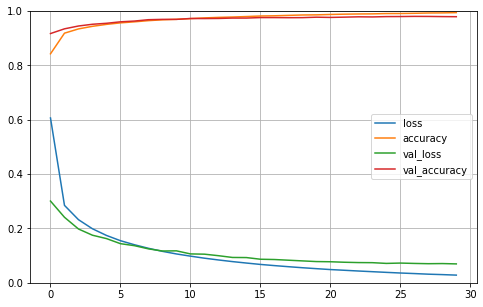

In [14]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Aqui temos um pequeno sobreajuste pois a acurácia do treino é maior que da validação, mas nada muito exagerado. 

In [15]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [37]:
pred = model.predict(X_test[:4])
print(pred)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


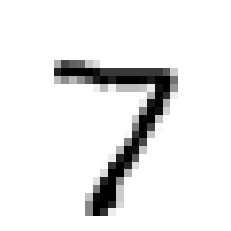

7


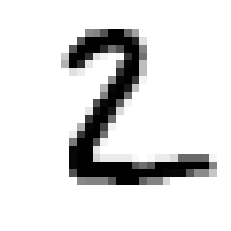

2


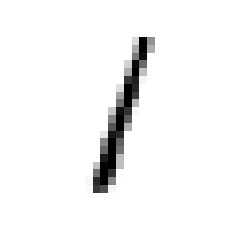

1


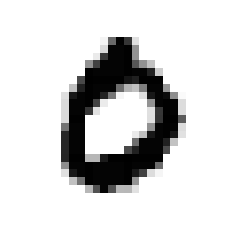

0


In [17]:
for i in range(4):
    num = show_numbers(i, X_test, y_test)

In [33]:
example = X_test[:1]
example.dtype

dtype('uint8')